# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 3</span>

### Plain vanilla option pricing

Un'opzione europea è un contratto tra due parti in cui il *writer* assume l'obbligo di vendere l'opzione all'*holder*, il quale ottiene il diritto di acquistare (*call*) dal *writer* o di vendergli (*put*) un sottostante $S(t)$ ad un prezzo fissato $K$ in una data futura $T$. Il profitto per una opzione *call* e una *put* è dato da:

$$ profitto_{CALL} = max[0,S(T)-K]$$

$$ profitto_{PUT} = max[0,K-S(T)]$$

La teoria di Black-Scholes assume che l'evoluzione temporale del prezzo dell'*asset* sia stocastica e mostri un moto browniano geometrico ($GBM$) con tasso di interesse privo di rischio costante $r$ e volatilità $\sigma$, del tipo:

$$ d\ln S(t) = \left(r -\frac{1}{2}\sigma^2\right)dt + \sigma dW(t) $$

Dato un prezzo dell'*asset* $S\sim GBM(r,\sigma^2)$, con valore iniziale $S(0)$, allora 

$$S(t) = S(0) \exp\left[ \left(r-\frac{1}{2}\sigma^2\right)t+\sigma W(t)\right]$$

dove $W(t)\sim\mathcal{N}(0,t)$.

Con queste assunzioni, la soluzione analitica di Black-Scholes per il prezzo di un'opzione *call* e *put* europea al tempo $t<T$, è data rispettivamente da:

$$ C\left[ S(t),t \right] = S(t) N(d_1) -K e^{-r(T-t)} N(d_2) $$

$$ P\left[ S(t),t \right] = S(t) \left[ N(d_1)-1\right] -K e^{-r(T-t)} \left[ N(d_2)-1\right]$$

dove
$$d_1 = \frac{1}{\sigma\sqrt{T-t}}\left[ \ln \left( \frac{S(t)}{K} \right) + \left( r+\frac{\sigma^2}{2} (T-t) \right)\right]$$

dove $d_2 = d_1 - \sigma\sqrt{T-t}$, e dove
$$ N(x) = \int_{-\infty}^{x} dz \, e^{-\frac{z^2}{2}} = \frac{1}{2} \left[ 1+ {\rm erf} \left( \frac{x}{\sqrt{2}}\right) \right]$$

è la cumulativa della distribuzione normale $\sim \mathcal{N}(0,1)$,
e dove
$${\rm erf}(x) = \frac{2}{\sqrt{\pi}}\int_{0}^{x} dz \, e^{-z^2}$$ 

### Exercise 03.1

In questo esercizio viene chiesto di calcolare al tempo $t=0$ tramite il metodo Monte Carlo, il prezzo dell'opzione *call* europea $C[S(0),0]$ e il prezzo dell'opzione *put* $P[S(0),0]$, utilizzando i seguenti parametri:

- Prezzo dell'*asset* a $t=0$: $S(0) = 100$
- Tempo di consegna: $T = 1$
- Prezzo di esercizio: $K = 100$
- Tasso di interesse privo di rischio: $r = 0.1$
- Volatilità: $\sigma = 0.25$

1. Campionando direttamente il prezzo finale dell'*asset* $S(T)$ da un moto browniano geometrico (GBM).
2. Campionando il percorso discretizzato del GBM, dividendo l'intervallo $[0,T]$ in 100 intervalli temporali: $S(0)$, $S(t_1)$, $S(t_2)$, ... fino a $S(t_{100}=T)$.

Poiché gli incrementi di $W$ sono indipendenti e distribuiti normalmente, la procedura ricorsiva esatta per campionare i valori discretizzati di $S\sim GBM(r,\sigma^2)$ a $t_1 < t_2 < … < t_n$ è:

$$S(t_{i+1}) = S(t_i) \exp\left[ \left(r-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i)+\sigma Z_{i+1}\sqrt{t_{i+1}-t_i}\right]$$

dove $Z_i \sim \mathcal{N}(0,1)$

L'idea per calcolare il prezzo dell'opzione al tempo $t=0$, è quella di campionare il profitto scontato di un fattore $e^{-rT}$, a causa dell'interesse che una banca avrebbe garantito con un deposito al tempo iniziale, cioè:

$$ \langle e^{-rT}~max[0,S(T)-K]\rangle_{PUT} $$

$$ \langle e^{-rT}~max[0,K-S(T)]\rangle_{CALL} $$

Questa quantità è infatti la stima di ciò che l'*holder* dell'opzione deve pagare a $t=0$ sulla base del profitto atteso al tempo $t=T$.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy
from scipy.special import erf
from numpy import exp
from numpy.lib.scimath import log, sqrt

In [2]:
# Black-Scholes analytic solution
S0 = 100.
K = 100.
T = 1.
r = 0.1
sigma = 0.25
t = 0

def N(x):
    return 0.5 * (1. + erf(x / sqrt(2.)))

def black_scholes(S0, K, T, r, sigma):
    d1 = 1./(sigma * sqrt(T)) * (log(S0 / K) + (r + (sigma**2) / 2.) * T)
    d2 = d1 - sigma * sqrt(T)
    C = S0 * N(d1) - K * exp(-r * T) * N(d2)
    P = S0 *(N(d1) - 1.) - K * exp(-r * T) * (N(d2)-1.)
    return C, P

if __name__ == "__main__":
    call, put = black_scholes(S0, K, T, r, sigma)
    print(" == BLACK-SCHOLES ==")
    print("call: ", call)
    print("put: ", put)

 == BLACK-SCHOLES ==
call:  14.975790778311286
put:  5.4595325819072364


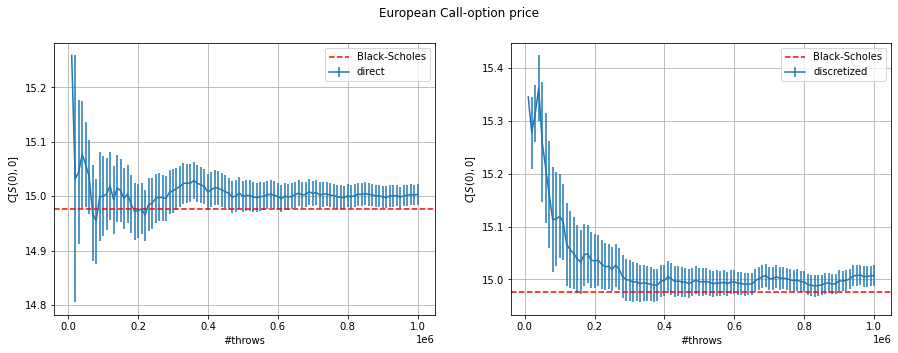

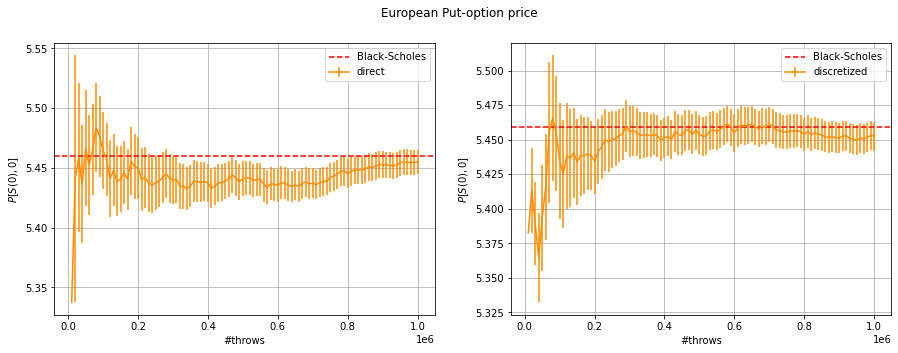

In [3]:
M=1000000             # Total number of throws
N=100                 # Number of blocks
L=int(M/N)            # Number of throws in each block
x = np.arange(N) + 1  # [0,1,2,...,N-1]
x*=L                  # Number of throws = block * (Number of throws in each block)

GBM_result = np.loadtxt('GBM_result.txt', delimiter=' ')
GBM_disc_result = np.loadtxt('GBM_disc_result.txt', delimiter=' ')

fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle("European Call-option price")

ax0.errorbar(x, GBM_result[:,0], yerr=GBM_result[:,1], label='direct')
ax0.axhline(y=call, color='r', label='Black-Scholes', ls='--')
ax0.set_xlabel('#throws')
ax0.set_ylabel('$C[S(0),0]$')
ax0.legend()
ax0.grid(True)

ax1.errorbar(x, GBM_disc_result[:,0], yerr=GBM_disc_result[:,1], label='discretized')
ax1.axhline(y=call, color='r', label='Black-Scholes', ls='--')
ax1.set_xlabel('#throws')
ax1.set_ylabel('$C[S(0),0]$')
ax1.legend()
ax1.grid(True)
plt.show()

fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle("European Put-option price")

ax0.errorbar(x, GBM_result[:,2], yerr=GBM_result[:,3], color='darkorange', label='direct')
ax0.axhline(y=put, color='r', label='Black-Scholes', ls='--')
ax0.set_xlabel('#throws')
ax0.set_ylabel('$P[S(0),0]$')
ax0.legend()
ax0.grid(True)

ax1.errorbar(x, GBM_disc_result[:,2], yerr=GBM_disc_result[:,3], color='darkorange', label='discretized')
ax1.axhline(y=put, color='r', label='Black-Scholes', ls='--')
ax1.set_xlabel('#throws')
ax1.set_ylabel('$P[S(0),0]$')
ax1.legend()
ax1.grid(True)
plt.show()

In questo esercizio ho cambiato i *Primes* del generatore di numeri casuali, così che le incertezze risultassero minori. Dai grafici si può osservare una buona compatibilità tra la soluzione analitica di Black-Scholes e la stima Monte Carlo, per il prezzo di un'opzione *call* e *put* europea.